In [24]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [25]:
with open('../data/full_seq_dict.json', "r") as json_file:
    seq_dict = json.load(json_file)

In [26]:
data = {}
dir_path = '../results/'
names = ['8M', '35M', '150M', '3B']
for name in names: 
    path = dir_path + name + '_L_std.json' 
    data[name] =  json.load(open(path))                     

In [27]:
save_dir = '../figures_manuscript/'

8M
35M
150M
3B


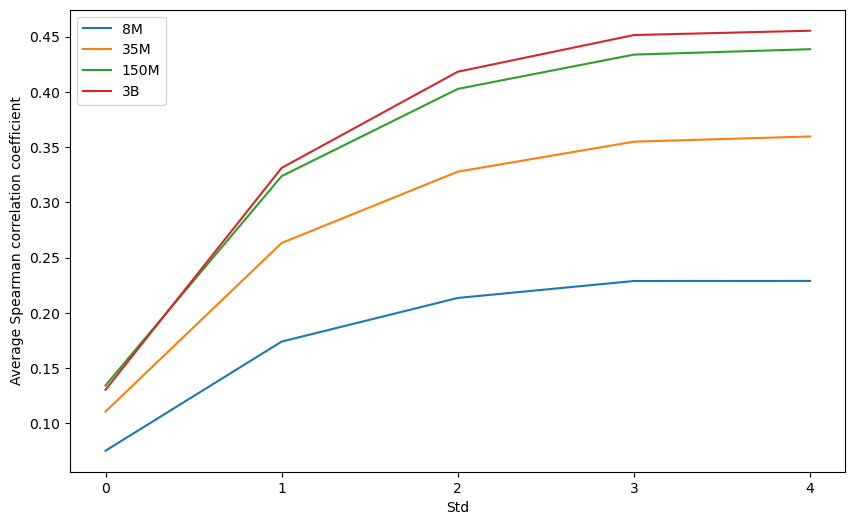

In [30]:
plt.figure(figsize=(10, 6))
for filename, cc_info in data.items():
    print(filename)
    averages = [np.mean([cc_info[pdb][str(i)] for pdb in cc_info]) for i in range(0, 5)]
    plt.plot(range(0, 5), averages, label=filename.split('_')[0])

plt.xlabel('Std')
plt.xticks(np.arange(0,5))
plt.ylabel('Average Spearman correlation coefficient')
plt.legend()
plt.savefig(save_dir + 'average_cc_i.svg') 
plt.show()

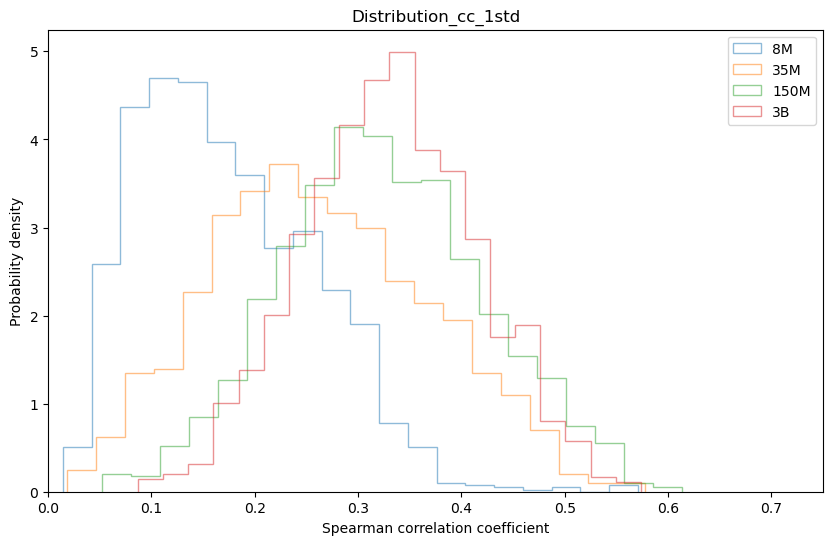

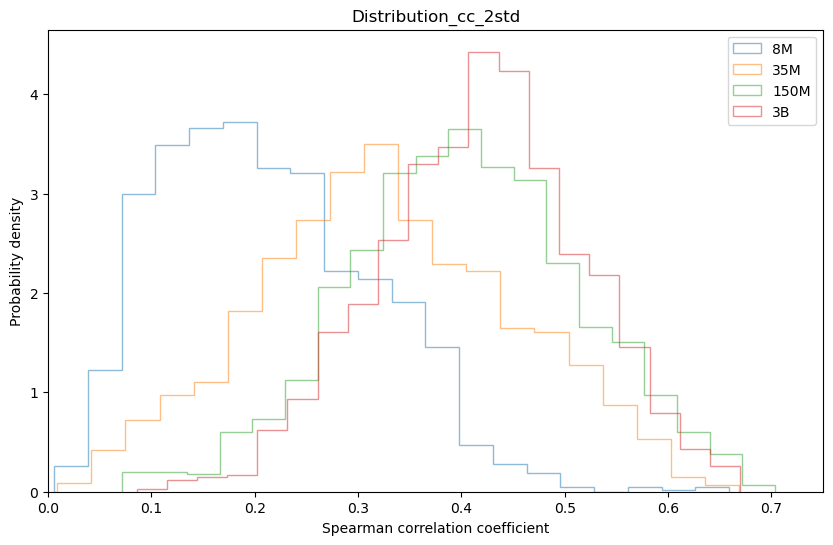

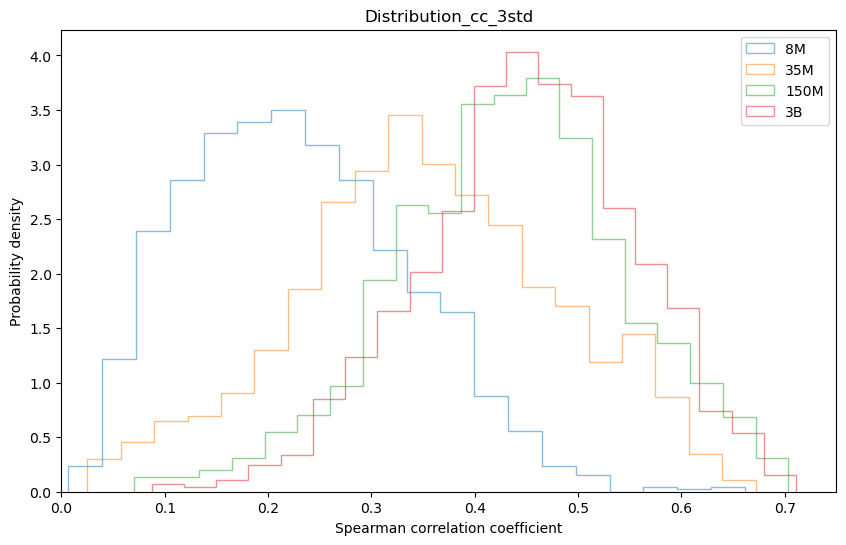

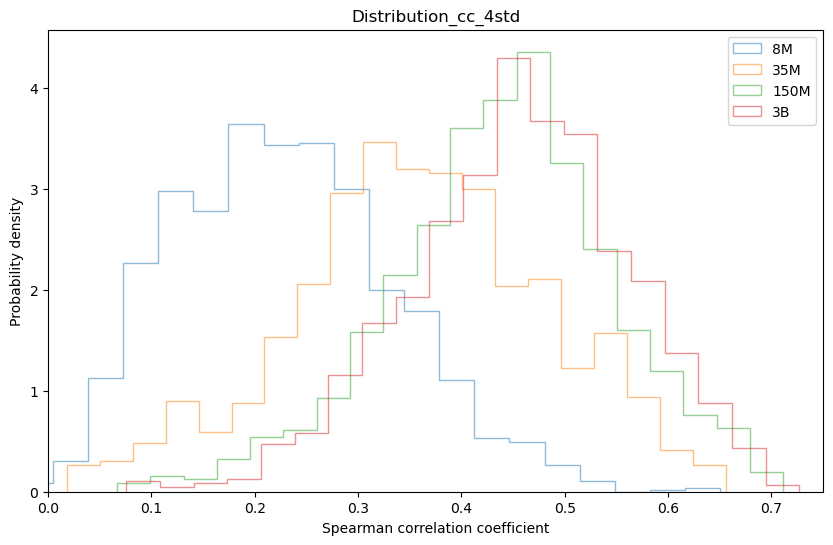

In [16]:
for i in range(1, 5):
    plt.figure(figsize=(10, 6))
    for filename, cc_info in data.items():
        values = [cc_info[pdb][str(i)] for pdb in cc_info]
        plt.hist(values, bins=20, alpha=0.5, label=filename.split('_')[0], histtype='step', density = True)

    plt.xlabel('Spearman correlation coefficient')
    plt.xlim(0, 0.75)
    plt.ylabel('Probability density')
    plt.title(f'Distribution_cc_{i}std')
    plt.legend()
    plt.savefig(save_dir + f'distribution_cc_{i}std' + '.svg') 
    plt.show()

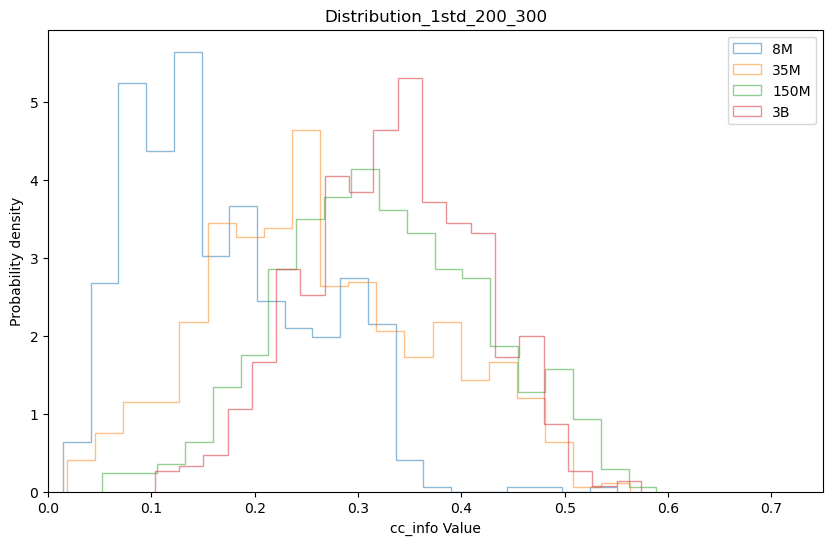

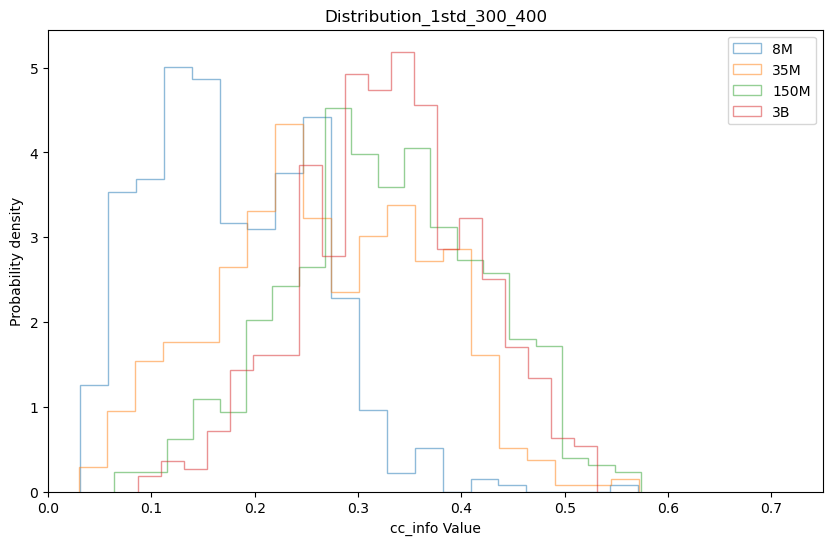

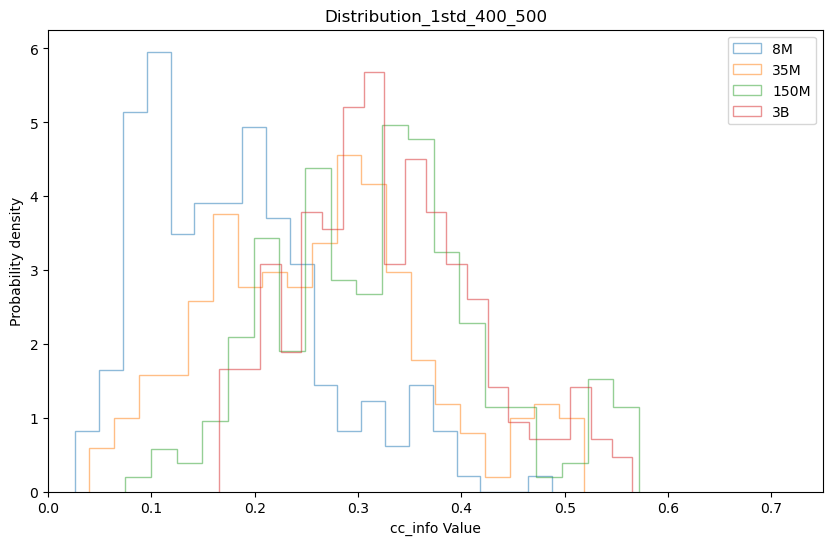

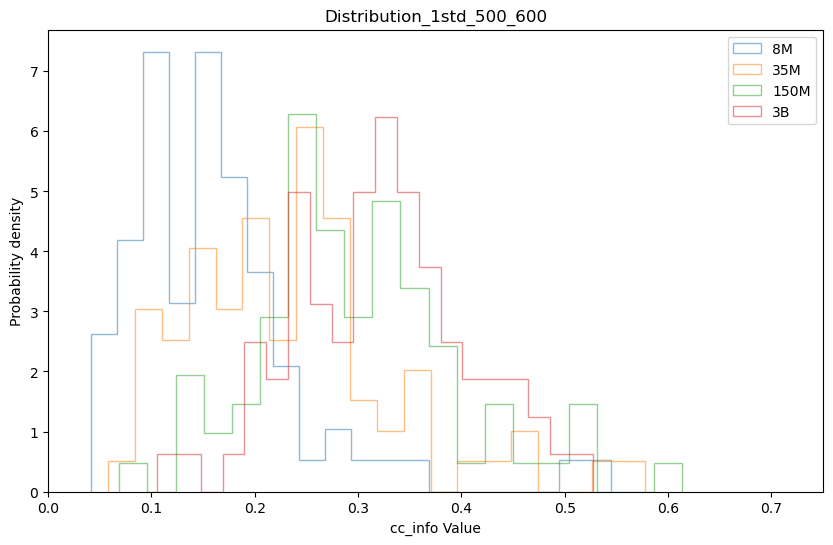

In [17]:
length_ranges = [(200, 300), (300, 400), (400, 500), (500, 600)]

for start, end in length_ranges:
    plt.figure(figsize=(10, 6))
    for filename, cc_info in data.items():
        filtered_values = [cc_info[pdb]['1'] for pdb in cc_info if start <= len(seq_dict[pdb]) < end]
        plt.hist(filtered_values, bins=20, alpha=0.5, label=filename.split('_')[0], histtype='step', density = True)

    plt.xlabel('cc_info Value')
    plt.xlim(0, 0.75)
    plt.ylabel('Probability density')
    plt.legend()
    plt.title(f'Distribution_1std_{start}_{end}')
    plt.savefig(save_dir + f'distribution_1std_{start}_{end}' + '.svg') 
    plt.show()